<a href="https://colab.research.google.com/github/ankygupta9999/DL-image-captioning/blob/main/DL_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Loading**

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import pickle
import os

DIR_PATH = "/content/gdrive/MyDrive/Datasets"
CAPTIONS_PATH = os.path.join(DIR_PATH, "set_1.pkl")

objects = pd.read_pickle(CAPTIONS_PATH)
print('First entry in pickle file:')
print(objects[0], '\n')
print('Total entries in pickle file = ', len(objects), '\n')

First entry in pickle file:
2089122314_40d5739aef.jpg#3	A fluffy , tri-colored dog be run down a road with a paper in its mouth . 

Total entries in pickle file =  25000 



In [3]:
import zipfile

IMAGES_PATH = os.path.join(DIR_PATH, "Image_captioning_Dataset.zip")

with zipfile.ZipFile(IMAGES_PATH, 'r') as zip_ref:
    zip_ref.extractall(DIR_PATH)

In [4]:
IMAGES_DIR = os.path.join(DIR_PATH, "Flicker8k_Dataset")

**Data Extraction (DataFrame)**

In [5]:
raw_df = pd.DataFrame()

for i, row in enumerate(objects):
  img_dict = {}
  img_dict['img_nm'] = str(row).split('#')[0]
  img_dict['caption_id'] = row.split(img_dict['img_nm'])[1].split('\t')[0]
  img_dict['img_caption'] = row.split('\t')[1]
  raw_df =raw_df.append(img_dict, ignore_index=True)

raw_df.head()

,caption_id,img_caption,img_nm
0,#3,"A fluffy , tri-colored dog be run down a road ...",2089122314_40d5739aef.jpg
1,#0,A crowd of person be stand together on a sidew...,1295671216_cde1b9c9d1.jpg
2,#4,"The man and boy sit on the ground , next to a ...",3183195185_cd0ff994a1.jpg
3,#1,A brown dog be play with a white fluffy stuff ...,2949353587_64c54e9589.jpg
4,#2,A man hike with a large backpack and two pole ...,361092202_3d70144ebd.jpg


In [6]:
raw_df.info(verbose=True)
print('\n')
print('Unique image names = ', len(raw_df.img_nm.unique()), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   caption_id   25000 non-null  object
 1   img_caption  25000 non-null  object
 2   img_nm       25000 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB


Unique image names =  8033 



**Data Extraction (Dictionary)**

In [43]:
def map_captions_images(captions_path, images_dir):
  captions_data = pd.read_pickle(captions_path)
  print('Captions data length = ', len(captions_data), '\n')

  for i, row in enumerate(captions_data):
    captions_mapping = {} # dictionary mapping image names to captions
    captions_text = [] # list of all captions
    img_name = str(row).split('#')[0] # get image name
    img_name = os.path.join(images_dir, img_name.strip()) # append image path
    img_caption = row.split('\t')[1] # get image caption
    img_cnt = 0

    if img_name.endswith("jpg"):
      img_caption = "<start> " + img_caption.strip() + " <end>" # add start & end token
      captions_text.append(img_caption)
      
      if img_name in captions_mapping:
        captions_mapping[img_name].append(img_caption)
      else:
        captions_mapping[img_name] = [img_caption]
        img_cnt = img_cnt + 1
  
  print('Total Images = ', img_cnt, '\n')

  return captions_mapping, captions_text

captions_mapping, captions_text = map_captions_images(CAPTIONS_PATH, IMAGES_DIR)

Captions data length =  25000 

Total Images =  1 



**Sample Printing (DataFrame)**

In [44]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [45]:
def print_sample_imgs(img_dir, pics, nrows, ncols, nimages, df):
  nrows = nrows
  ncols = ncols

  # Index for iterating over images
  pic_index = 0
  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols * 6, nrows * 3)

  print("======================================================")
  print("============== Printing Sample images ================")
  print("======================================================")
  j = 1
  for i, img_nm in enumerate(pics):
    if i < nimages:
      # print ("printing {} , image :{}".format(i, img_nm))
      caption = list(df[df['img_nm'] == img_nm]['img_caption'])[0]
      just_img_nm = img_nm.split(sep='.')[0]
      # Set up subplot; subplot indices start at 1
      sp = plt.subplot(nrows, ncols, j)
      sp.axis('Off') # Don't show axes (or gridlines)
      sp.set_title("Img # "+ str(i+1) + " - Caption :" +caption, loc='left')
      raw_img_nm = img_dir + '/' + img_nm
      img = mpimg.imread(raw_img_nm)
      plt.imshow(img)

      j = j + 1
    else:
      break
  plt.show()

============== Printing Sample images ================


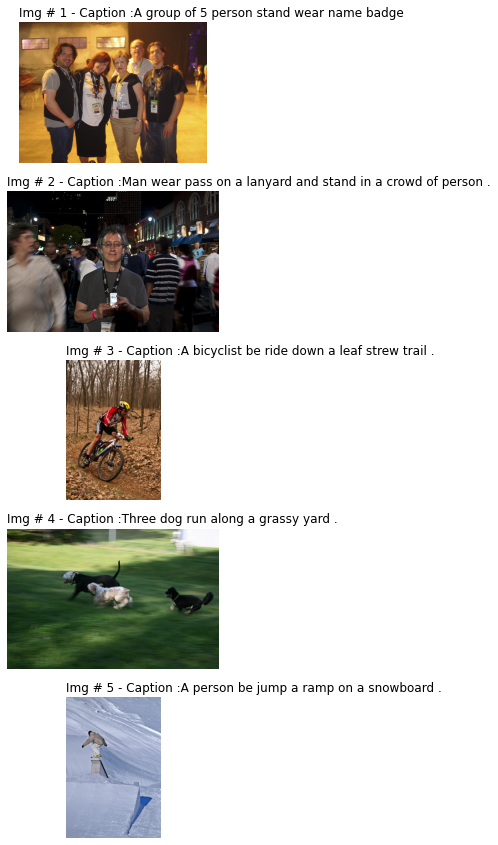

In [46]:
print_sample_imgs(IMAGES_DIR, os.listdir(IMAGES_DIR), nrows=5, ncols=1, nimages=5, df=raw_df)

**Sample Printing (Dictionary)**

In [47]:
def plot_sample_imgs(img_dir, pics, nrows, ncols, nimages, df):
  nrows = nrows
  ncols = ncols

  # Index for iterating over images
  pic_index = 0
  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols * 6, nrows * 3)

  print("======================================================")
  print("============== Printing Sample images ================")
  print("======================================================")
  j = 1
  for i, img_name in enumerate(pics):
    if i < nimages:
      # print ("printing {} , image :{}".format(i, img_nm))
      #caption = list(df[df['img_nm'] == img_nm]['img_caption'])[0]
      caption = captions_mapping[img_name]
      just_img_name = img_name.split(sep='.')[0]
      # Set up subplot; subplot indices start at 1
      sp = plt.subplot(nrows, ncols, j)
      sp.axis('Off') # Don't show axes (or gridlines)
      sp.set_title("Img # "+ str(i+1) + " - Caption :" +caption, loc='left')
      raw_img_name = img_dir + '/' + img_name
      img = mpimg.imread(raw_img_name)
      plt.imshow(img)

      j = j + 1
    else:
      break
  plt.show()

In [48]:
plot_sample_imgs(IMAGES_DIR, os.listdir(IMAGES_DIR), nrows=5, ncols=1, nimages=5, df=raw_df)

============== Printing Sample images ================


KeyError: ignored

<Figure size 432x1080 with 0 Axes>

**Data Preparation (Dictionary)**

In [49]:
import numpy as np

def train_val_split(captions_mapping, train_size=0.8, shuffle=True):
    image_names = list(captions_mapping.keys()) # list of all image names

    if shuffle:
        np.random.shuffle(image_names) # shuffle

    train_size = int(len(captions_mapping) * train_size) # split into training & validation

    training_data = {
        img_name: captions_mapping[img_name] for img_name in image_names[:train_size]
    }
    validation_data = {
        img_name: captions_mapping[img_name] for img_name in image_names[train_size:]
    }

    return training_data, validation_data

training_data, validation_data = train_val_split(captions_mapping)
print("Number of training samples: ", len(training_data))
print("Number of validation samples: ", len(validation_data))

Number of training samples:  0
Number of validation samples:  1
